<a href="https://colab.research.google.com/github/malkang92/skku_ML/blob/main/7%EC%A3%BC%EC%B0%A8_%EA%B5%B0%EC%A7%91%ED%99%94_%EC%9D%B4%EA%B0%95%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집화 (Clustering) (실습)

### [1] 실습 진행 관련 설명
군집화에 대한 실습을 진행하고자 한다. 실습은 크게 두가지로 구성되어 있다.

- sklearn 라이브러리를 이용한 방법
- 직접 함수를 구현하는 방법

처음에는 sklearn 라이브러리를 이용한 방법을 실습하고 그 이후에 직접 함수를 구현하여 실습을 진행한다.

## [2] 코드 구현의 흐름


- (1) (데이터 측면) 데이터 불러오기

- (2) (모델 측면) sklearn 라이브러리를 이용하여 K-평균 군집화 불러오기. 또는 직접 함수 구현하기 (K-평균 군집화 모델 정의).

- (3) (학습 과정) sklearn 라이브러리를 이용하여 알고리즘 수행하기. 또는 직접 구현하기 (K의 값에 따라).

## (공통) 데이터 불러오기




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# (1) (데이터 측면)데이터 불러오기

fname_data = '/content/drive/MyDrive/SKKU폴더/25_하반기_06.기계학습특론/exercise/clustering_data.csv'
#텍스트 데이터를 numpy array 형태로 바로 변환해주는 함수
#","를 기준으로 데이터를 나누어 주었는데, csv 파일은 데이터가 "," 를 기준으로 나누어졌기 때문
feature = np.genfromtxt(fname_data, delimiter=',')

#데이터의 특징벡터를 각각 분할하여 사용
x1 = feature[:,0]
x2 = feature[:,1]

#데이터의 전체 갯수와 특징벡터의 수를 확인해보자.
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

In [20]:
fname_data = '/content/drive/MyDrive/SKKU폴더/25_하반기_06.기계학습특론/exercise/clustering_data.csv'
feature = np.genfromtxt(fname_data, delimiter=',')

x1 = feature[:,0]
x2 = feature[:,1]

number_data = np.size(feature, 0)
number_feature = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


In [ ]:
# (1-2) (데이터 측면)데이터 시각화

# 군집화를 시행하기 전 데이터가 어떻게 구성되어 있는지 확인해보자
plt.figure(figsize=(8,8))
plt.title('input data')
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.plot(x1,x2,'o', c="blue")

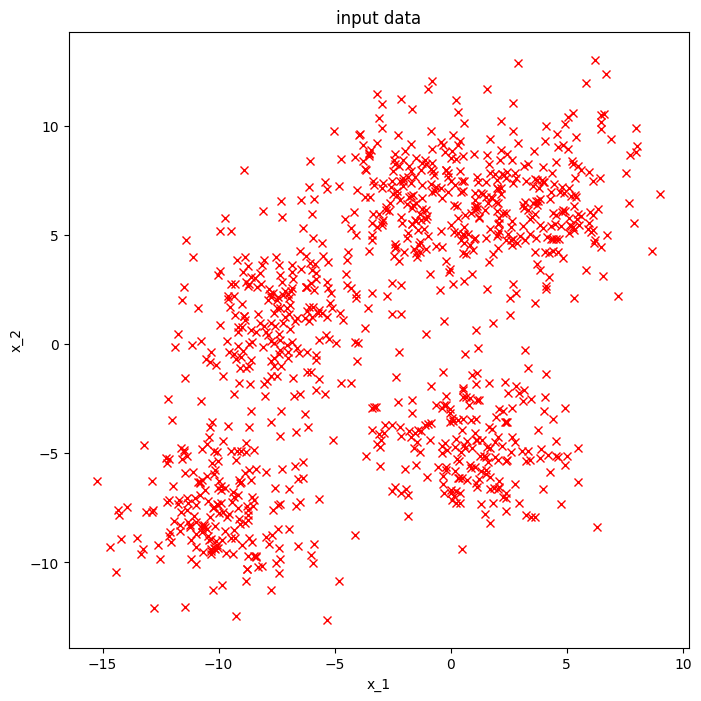

In [21]:
plt.figure(figsize=(8,8))
plt.title('input data')
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.plot(x1,x2,'x', c="red")

## (첫번째 실습) sklearn 라이브러리를 이용한 방법




In [ ]:
# K-평균 군집화(K-means Clustering)

# 라이브러리 불러오기 (Importing the libraries)
from sklearn.cluster import KMeans
import pandas as pd

# (3) (모델 측면) sklearn 라이브러리를 이용하여 K-평균 클러스터링 불러오기 (k=5)
# n_clusters 를 통해서 해당 데이터를 몇개의 군집으로 분류할 것인지를 결정해준다.
model = KMeans(n_clusters=5)
model.fit(feature)

# (4) (학습 과정) sklearn 라이브러리를 이용하여 알고리즘 수행하기.
predict = pd.DataFrame(model.predict(feature))

# (5) (성능 평가) K= 5일때, 결과 시각화
def plot_cluster(feature, label_feature):
    x1 = feature[:,0]
    x2 = feature[:,1]
    plt.figure(figsize=(8,8))
    plt.title('cluster')
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    #각각 데이터 별 분류된 군집에 따라서 색상을 다르게 표시해준다
    #데이터를 표기할 때 "o"를 사용하면 점 형태로 표현할 수 있다.
    #c는 color을 의미하며 색상을 작성하면 해당 색상으로 데이터를 표기한다.
    plt.plot(x1[label_feature==0], x2[label_feature==0],'o', c="skyblue")
    plt.plot(x1[label_feature==1], x2[label_feature==1],'o', c="yellow")
    plt.plot(x1[label_feature==2], x2[label_feature==2],'o', c="green")
    plt.plot(x1[label_feature==3], x2[label_feature==3],'o', c="red")
    plt.plot(x1[label_feature==4], x2[label_feature==4],'o', c="violet")
    plt.tight_layout()
    plt.show()
plot_cluster(feature, predict.values.ravel())

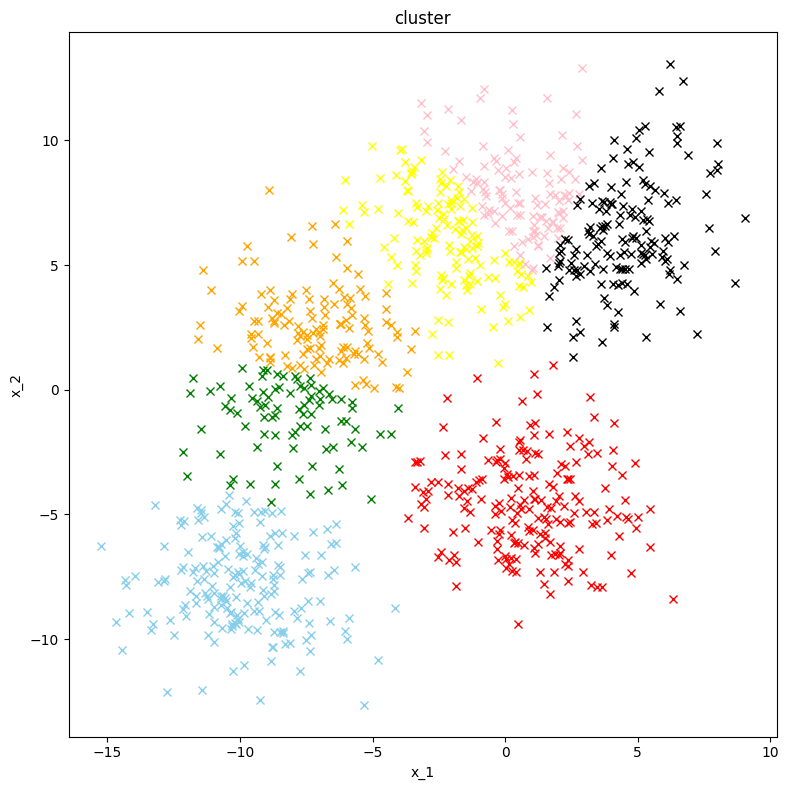

In [26]:
from sklearn.cluster import KMeans
import pandas as pd

model = KMeans(n_clusters=7)
model.fit(feature)

predict = pd.DataFrame(model.predict(feature))

def plot_cluster(feature, label_feature):
  x1 = feature[:,0]
  x2 = feature[:,1]
  plt.figure(figsize=(8,8))
  plt.title('cluster')
  plt.xlabel("x_1")
  plt.ylabel("x_2")

  plt.plot(x1[label_feature==0], x2[label_feature==0], "x", c="skyblue")
  plt.plot(x1[label_feature==1], x2[label_feature==1], "x", c="yellow")
  plt.plot(x1[label_feature==2], x2[label_feature==2], "x", c="green")
  plt.plot(x1[label_feature==3], x2[label_feature==3], "x", c="red")
  plt.plot(x1[label_feature==4], x2[label_feature==4], "x", c="pink")
  plt.plot(x1[label_feature==5], x2[label_feature==5], "x", c="orange")
  plt.plot(x1[label_feature==6], x2[label_feature==6], "x", c="black")
  plt.tight_layout()
  plt.show()

plot_cluster(feature, predict.values.ravel())



## (두번째 실습) 직접 함수를 구현하는 방법

In [ ]:
# (3) (모델 측면) K-평균 군집화 직접 구현하기 (k=5)

# (3-1) 거리 연산 함수 선언하기
# 중심점과 데이터 인스턴스 사이의 거리를 연산한다.
# k번째 중심점(centroid)과 관측값들간의 거리를 계산한 결과를 반환한다.
def compute_distance(feature, center):
    #연산해야하는 데이터의 수
    # numpy의 size()함수에서 인자로 주어진 0 혹은 1의 숫자는
    # axis = 0, axis = 1을 의미한다. 해당 축방향을 기준으로
    # ndarray의 크기를 측정하면. axis=0이면 데이터 인스턴스의 수
    # axis = 1이면 특징의 수를 확보할 수 있다.
    n  = np.size(feature, 0)
    #데이터의 특징벡터의 수
    m  = np.size(feature, 1)
    distance = np.zeros(shape=(n))
    for i in range(n): #전체 데이터에 대해서 거리 연산을 수행해야한다.
        dist = 0
        for j in range(m): #각 데이터의 특징벡터의 수만큼 진행한다
            feat = feature[i]
            #각 특징벡터 값의 차이를 제곱해서 더해준다.
            dist = dist + np.power((feat[j]-center[j]), 2) #유클리디안 거리 함수에서 square root 내부 구현
        distance[i] = np.sqrt(dist)
    return distance

# (3-2) 중심점 계산 함수 구현하기
#특정 클러스터로 연산된 점들로부터 새로운 중심점을 계산한다.
def compute_centroid(feature, label_feature, value_label):
    #연산해야하는 데이터의 수
    n  = np.size(feature, 0)
    #데이터의 특징벡터의 수
    m  = np.size(feature, 1)
    centroid = np.zeros(shape=(m))
    cnt = 0
    for i in range(n): #n개의 데이터 인스턴스 모두에 대해서 연산을 진행한다.
        if label_feature[i] == value_label:
            cnt = cnt+1
            # m은 특징 벡터를 구성하는 특징의 갯수임에 주의
            for j in range(m):
                feat = feature[i]
                centroid[j] = centroid[j] + feat[j]
    # k번째 클러스터의 centroid는 동일한 value_label(즉, k)를 갖는 관측값들의
    # 특징값의 평균으로 표시된다.
    # value_label이 동일한 특징 벡터들에 대하여 j번째 특징의 값을 모두 더한 후
    # value_lable이 동일한 관측값들의 갯수(cnt)로 나누어주어 centroid를 계산한다.
    centroid = centroid / cnt
    return centroid

# (3-3) 클러스터 결정 함수 구현하기
# centroid에 대하여 계산된 거리를 기반으로 클러스터를 결정해준다.
def compute_label(distance):
    #연산 데이터의 수
    n  = np.size(distance, 0)
    # 클러스터의 수
    k  = np.size(distance, 1)
    index_label_feature = np.zeros(shape=(n))
    for i in range(n): # n 개의 데이터 인스턴스 모두에 대해서 연산을 진행한다.
        dist = distance[i]
        label = np.argmin(dist) # 각 클러스터별 거리 중에서 가장 작은것을 클러스터로 결정한다.
        # 현재 dist에는 i번째 데이터 인스턴스와 k개의 클러스터 센트로이드와의 거리 정보가 저장되어 있다.
        # np.argmin(dist)는 k개의 클러스터 센트로이드와의 거리 중 가장 작은 값에 해당하는
        # 인덱스 정보를 반환한다.
        # 클러스터 레이블은 0, 1, ..., k-1의 값으로 표시됨에 유의
        index_label_feature[i] = label
    return index_label_feature

# (4) (학습 과정) 직접 구현한 함수를 이용하여 알고리즘 수행하기.
number_cluster      = 5   #군집의 수
number_iteration    = 20  #알고리즘 반복 횟수
distance            = np.zeros(shape=(number_data, number_cluster)) # 거리 배열 [데이터의수, 클러스터의수]
centroid            = np.zeros(shape=(number_cluster, number_feature)) # 중심점 배열 [클러스터의수, 특징벡터의수]
loss_iteration      = np.zeros(shape=(number_iteration, 1)) # 반복횟수 별 손실값
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature)) #반복횟수 별 중심점 배열
label_feature = np.zeros(shape=(number_data,1)) # 군집라벨 [데이터의수 , 군집라벨값]
label_cluster = [0,1,2,3,4]
# 중심점 초기화(랜덤한 곳)
# 데이터 인스턴스를 최초 중심점으로 활용
duplist = [] #중심점의 중복을 막기 위함
for i in range(number_cluster):
    ran = np.random.randint(0,number_data)  #최초 중심점 설정을 위한 랜덤값 설정
    while ran not in duplist: # 결정된 군집과 중복을 확인하여, 중복이 발생하는 경우 경우 재설정
        ran = np.random.randint(0,number_data)
        duplist.append(ran)
        centroid[i] = feature[ran]

#지정된 반복횟수만큼 반복
for i in range(number_iteration):
    loss = 0
    #모든 클러스터에 대해서 각 중심점과 데이터의 거리를 연산
    for k in range(number_cluster):
        distance[:,k] = compute_distance(feature, centroid[k])
    #연산된 거리를 기반으로 클러스터 레이블 부여
    label_feature = compute_label(distance)
    #모든 클러스터에 대해서 새로운 중심점 연산
    for k in range(number_cluster):
        centroid[k] = compute_centroid(feature, label_feature, k)
    centroid_iteration[i] = centroid
    #각 클러스터별 중심점과 데이터 사이의 거리의 합을 손실값으로 정의
    for n in range(number_data):
        label = int(label_feature[n])
        loss = loss + distance[n][label]
    loss_iteration[i] = loss / n
    print("iteration = %4d, SSE = %5.5f" % (i, loss/n))

In [30]:
def compute_distance(feature, center):
  n = np.size(feature, 0)
  m = np.size(feature, 1)
  distance = np.zeros(shape=(n))
  for i in range(n):
    dist = 0
    for j in range(m):
      feat = feature[i]
      dist = dist + np.power((feat[j]-center[j]), 2) # 거리 = 거리 + 유클리디안 거리
    distance[i] = np.sqrt(dist)
  return distance

In [31]:
def compute_centroid(feature, label_feature, value_label):
  n = np.size(feature, 0)
  m = np.size(feature, 1)
  centroid = np.zeros(shape=(m))
  cnt = 0
  for i in range(n):
    if label_feature[i] == value_label:
      cnt = cnt + 1
      for j in range(m):
        feat = feature[i]
        centroid[j] = centroid[j] + feat[j]
  centroid = centroid / cnt
  return centroid

In [32]:
def compute_label(distance):
  n = np.size(distance, 0)
  k = np.size(distance, 1)
  index_label_feature = np.zeros(shape=(n))
  for i in range(n):
    dist = distance[i]
    label = np.argmin(dist)
    index_label_feature[i] = label
  return index_label_feature

In [33]:
number_cluster = 5
number_iteration = 20
distance = np.zeros(shape=(number_data, number_cluster))
centroid = np.zeros(shape=(number_cluster, number_feature))
loss_iteration = np.zeros(shape=(number_iteration, 1))
centroid_iteration = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_feature = np.zeros(shape=(number_data, 1))
label_cluster = [0,1,2,3,4]

duplist = []
for i in range(number_cluster):
  ran = np.random.randint(0, number_data)
  while ran not in duplist:
    ran = np.random.randint(0, number_data)
    duplist.append(ran)
    centroid[i] = feature[ran]

In [35]:
for i in range(number_iteration):
  loss = 0
  for k in range(number_cluster):
    distance[:,k] = compute_distance(feature, centroid[k])
  label_feature = compute_label(distance)
  for k in range(number_cluster):
    centroid[k] = compute_centroid(feature, label_feature, k)
  centroid_iteration[i] = centroid
  for n in range(number_data):
    label = int(label_feature[n])
    loss = loss + distance[n][label]
  loss_iteration[i] = loss / n
  print("iteration = %4d, SSE = %5.5f" % (i, loss/n))

iteration =    0, SSE = 3.77620
iteration =    1, SSE = 2.65007
iteration =    2, SSE = 2.47640
iteration =    3, SSE = 2.46689
iteration =    4, SSE = 2.46591
iteration =    5, SSE = 2.46591
iteration =    6, SSE = 2.46606
iteration =    7, SSE = 2.46610
iteration =    8, SSE = 2.46615
iteration =    9, SSE = 2.46635
iteration =   10, SSE = 2.46664
iteration =   11, SSE = 2.46664
iteration =   12, SSE = 2.46664
iteration =   13, SSE = 2.46664
iteration =   14, SSE = 2.46664
iteration =   15, SSE = 2.46664
iteration =   16, SSE = 2.46664
iteration =   17, SSE = 2.46664
iteration =   18, SSE = 2.46664
iteration =   19, SSE = 2.46664


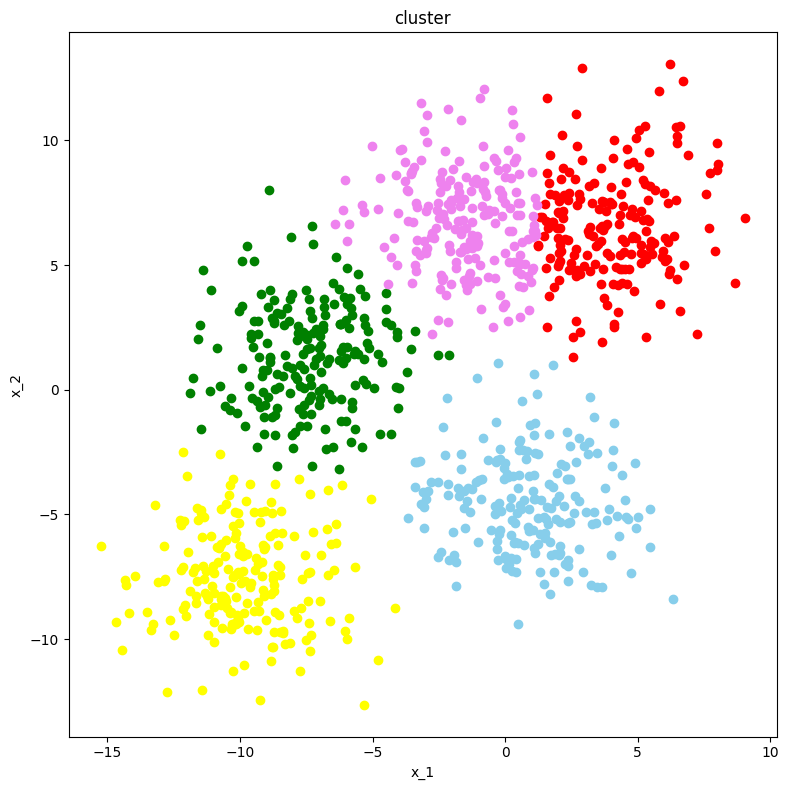

In [36]:
# (5) (성능 평가) K= 5일때, 결과 시각화
#데이터 시각화 함수, 위 실습1번과 동일
def plot_cluster(feature, label_feature):
    x = feature[:,0]
    y = feature[:,1]
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.plot(x[label_feature==0], y[label_feature==0],'o', c="skyblue")
    plt.plot(x[label_feature==1], y[label_feature==1],'o', c="yellow")
    plt.plot(x[label_feature==2], y[label_feature==2],'o', c="green")
    plt.plot(x[label_feature==3], y[label_feature==3],'o', c="red")
    plt.plot(x[label_feature==4], y[label_feature==4],'o', c="violet")
    plt.tight_layout()
    plt.show()
plot_cluster(feature, label_feature)

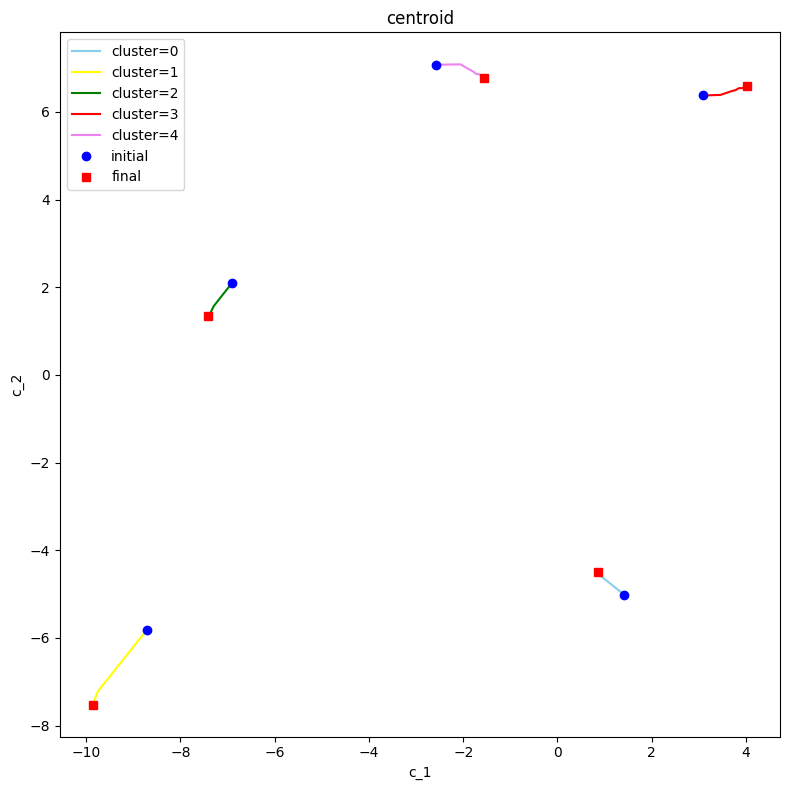

In [37]:
# (5-2) (성능 평가) 중심점 이동 경로 시각화
# 위에서 지정된 반복횟수동안 이동한 각 클러스터별 중심점의 값 확인
def plot_centroid(centroid_iteration):
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    plt.xlabel("c_1")
    plt.ylabel("c_2")
    plt.plot(centroid_iteration[:,0,0],centroid_iteration[:,0,1], '-', c='skyblue', label="cluster=0")
    plt.plot(centroid_iteration[:,1,0],centroid_iteration[:,1,1], '-', c='yellow', label="cluster=1")
    plt.plot(centroid_iteration[:,2,0],centroid_iteration[:,2,1], '-', c='green', label="cluster=2")
    plt.plot(centroid_iteration[:,3,0],centroid_iteration[:,3,1], '-', c='red', label="cluster=3")
    plt.plot(centroid_iteration[:,4,0],centroid_iteration[:,4,1], '-', c='violet', label="cluster=4")
    plt.plot(centroid_iteration[0,:,0],centroid_iteration[0,:,1], 'o', c='blue', label = "initial")
    plt.plot(centroid_iteration[-1,:,0],centroid_iteration[-1,:,1], 's', c='red', label = "final")
    plt.tight_layout()
    plt.legend()
    plt.show()
plot_centroid(centroid_iteration)